In [3]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
batch_size = 32
input_shape = (32, 400, 300, 3)
n_classes = 4
epoch = 100
dataset = tf.keras.preprocessing.image_dataset_from_directory("CoLeaf_DataSet",
                                                              shuffle=True,
                                                              image_size=(400, 300),
                                                              batch_size=batch_size)        

Found 412 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names
print(class_names)
print(len(dataset))

['healthy', 'nitrogen-N', 'phosphorus-P', 'potasium-K']
13


In [6]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    trn_ds = ds.take(train_size)
    vl_ds = ds.skip(train_size).take(val_size)
    tst_ds = ds.skip(train_size).skip(val_size)
    return trn_ds, vl_ds, tst_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(400, 300),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)])
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(2),
])

In [9]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
     layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(400, 300)),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

model.build(input_shape=input_shape)
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 400, 300, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 400, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 400, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 75, 64)      0         
 2D)                                                  

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_ds,
    epochs=epoch,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds

)

scores = model.evaluate(test_ds)
model.build(input_shape=input_shape)
print(model.summary())

Epoch 1/100
10/10 [==============================] - 37s 2s/step - loss: 1.3769 - accuracy: 0.5285 - val_loss: 1.1489 - val_accuracy: 0.5625
Epoch 2/100
10/10 [==============================] - 6s 597ms/step - loss: 1.0888 - accuracy: 0.5823 - val_loss: 1.0922 - val_accuracy: 0.5625
Epoch 3/100
10/10 [==============================] - 6s 591ms/step - loss: 1.0178 - accuracy: 0.6139 - val_loss: 1.0405 - val_accuracy: 0.5625
Epoch 4/100
10/10 [==============================] - 6s 590ms/step - loss: 0.9451 - accuracy: 0.6139 - val_loss: 1.0072 - val_accuracy: 0.5625
Epoch 5/100
10/10 [==============================] - 6s 585ms/step - loss: 0.9034 - accuracy: 0.6139 - val_loss: 0.8914 - val_accuracy: 0.5625
Epoch 6/100
10/10 [==============================] - 6s 588ms/step - loss: 0.8198 - accuracy: 0.6139 - val_loss: 0.7926 - val_accuracy: 0.5625
Epoch 7/100
10/10 [==============================] - 6s 578ms/step - loss: 0.7319 - accuracy: 0.6139 - val_loss: 0.7288 - val_accuracy: 0.5625
E

10/10 [==============================] - 6s 576ms/step - loss: 0.4213 - accuracy: 0.8101 - val_loss: 0.4887 - val_accuracy: 0.8125
Epoch 42/100
10/10 [==============================] - 6s 586ms/step - loss: 0.3844 - accuracy: 0.8544 - val_loss: 0.4549 - val_accuracy: 0.7812
Epoch 43/100
10/10 [==============================] - 6s 580ms/step - loss: 0.4127 - accuracy: 0.8291 - val_loss: 0.4294 - val_accuracy: 0.8125
Epoch 44/100
10/10 [==============================] - 6s 581ms/step - loss: 0.3429 - accuracy: 0.8576 - val_loss: 0.4871 - val_accuracy: 0.8438
Epoch 45/100
10/10 [==============================] - 6s 578ms/step - loss: 0.3837 - accuracy: 0.8449 - val_loss: 0.2865 - val_accuracy: 0.9062
Epoch 46/100
10/10 [==============================] - 6s 575ms/step - loss: 0.5946 - accuracy: 0.7595 - val_loss: 0.5132 - val_accuracy: 0.8750
Epoch 47/100
10/10 [==============================] - 6s 585ms/step - loss: 0.5631 - accuracy: 0.7595 - val_loss: 0.4385 - val_accuracy: 0.8438
Epoch

Epoch 98/100
10/10 [==============================] - 6s 594ms/step - loss: 0.1560 - accuracy: 0.9367 - val_loss: 0.1328 - val_accuracy: 0.9375
Epoch 99/100
10/10 [==============================] - 6s 590ms/step - loss: 0.1168 - accuracy: 0.9525 - val_loss: 0.3129 - val_accuracy: 0.9062
Epoch 100/100
2/2 [==============================] - 7s 72ms/step - loss: 0.2413 - accuracy: 0.8594
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 400, 300, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 400, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 400, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 150, 32)     0      

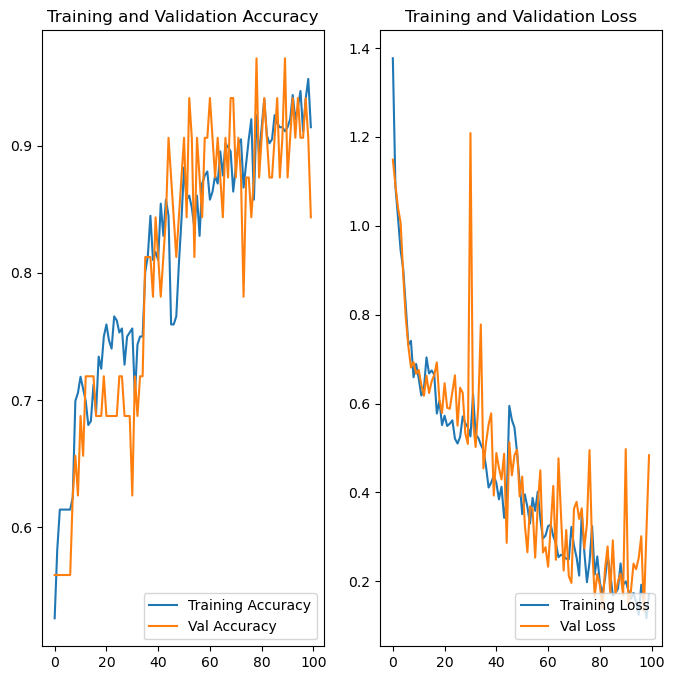

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(epoch),acc,label='Training Accuracy')
plt.plot(range(epoch),val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epoch),loss,label='Training Loss')
plt.plot(range(epoch),val_loss,label='Val Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
import os
fig_version = max([int(i) for i in os.listdir("./figures")+ [0]])+1
plt.savefig(f"./figures/{fig_version}")

In [15]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence



1/1 [==============================] - 0s 28ms/step


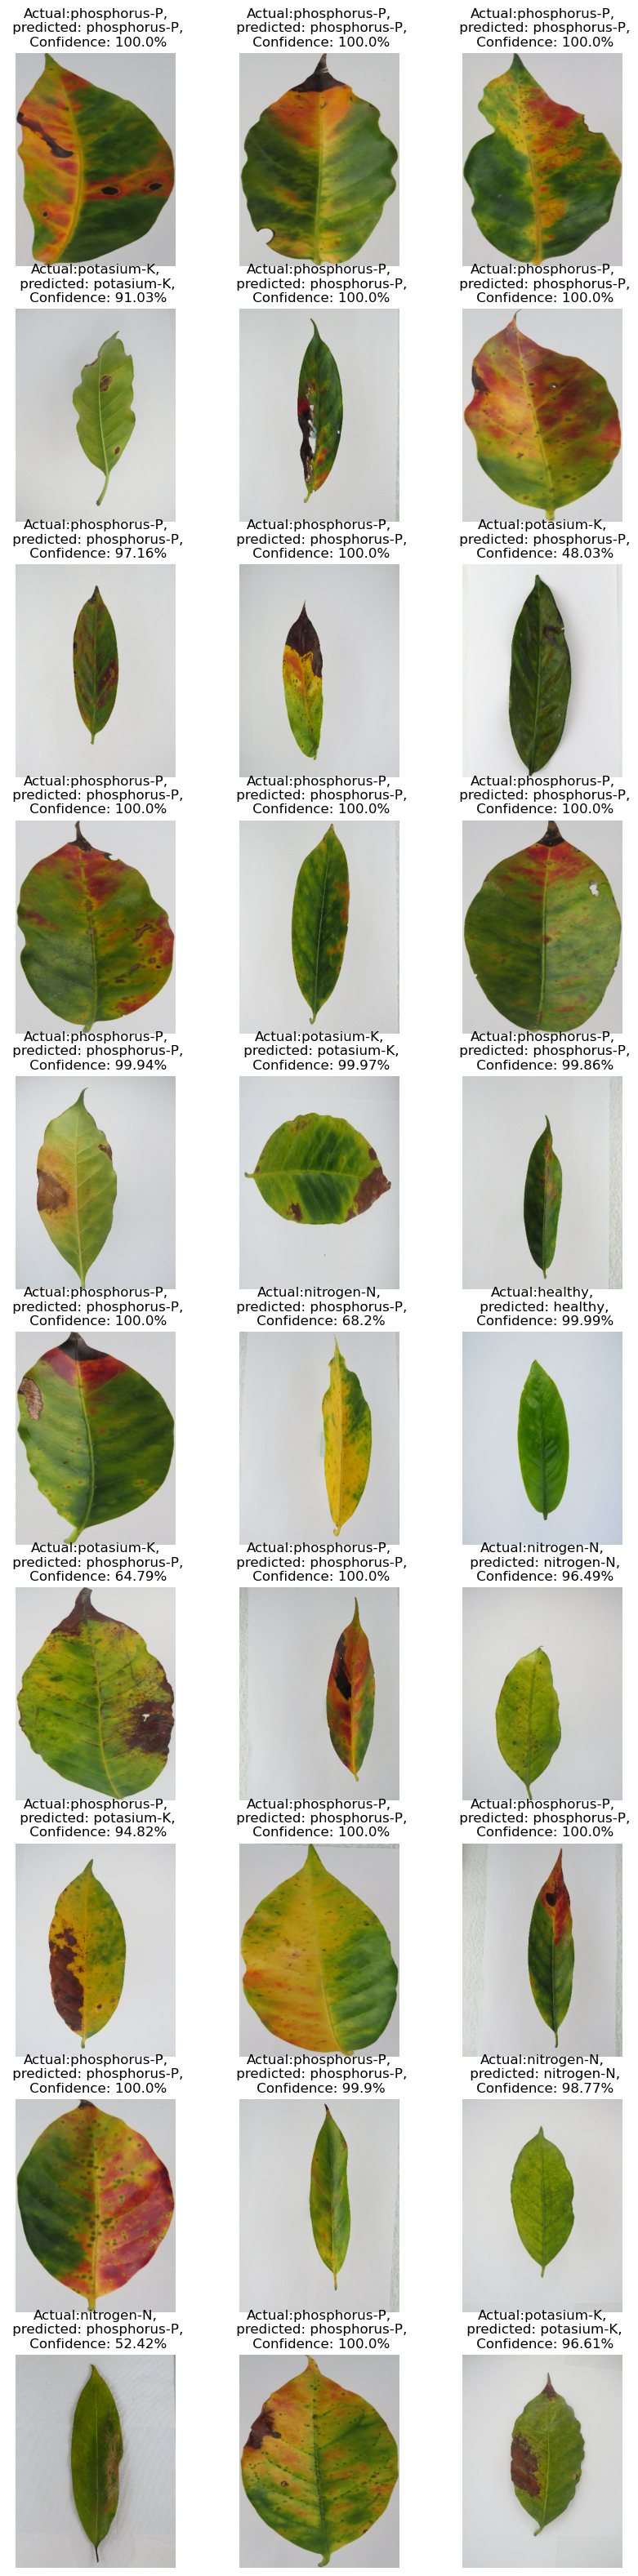

In [16]:
plt.figure(figsize=(10,40))
for images,labels in test_ds.take(1):
    for i in range(30):
        ax = plt.subplot(10,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
    
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis('off')
 
prediction = max([int(i) for i in os.listdir("./prediction")+ [0]])+1
plt.savefig(f"./prediction/{fig_version}")

In [12]:
model_version = max([int(i) for i in os.listdir("./models")+ [0]])+1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets
